In [1]:
import numpy
import os
filename = ("/home/manikanta/Documents/ML/classification/height-weight1.csv")
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=",")

In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib  as plt

In [3]:
df='https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Ensemble/height-weight.csv'

In [4]:
#import urllib.request
data=pd.read_csv(df,header=None)
data.columns=["Height","weight"]

In [5]:
data.columns

Index(['Height', 'weight'], dtype='object')

In [6]:
data.head(4)

,Height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470


In [7]:
data.tail(5)

,Height,weight
4995,68.860062,177.131052
4996,68.973423,159.285228
4997,67.013795,199.195400
4998,71.557718,185.905910
4999,70.351880,198.903012


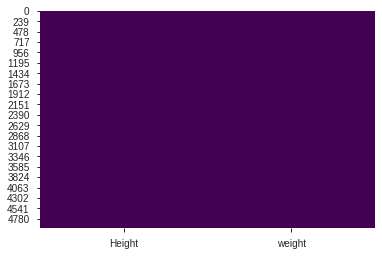

In [8]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [9]:
data.isna().sum()

Height    0
weight    0
dtype: int64

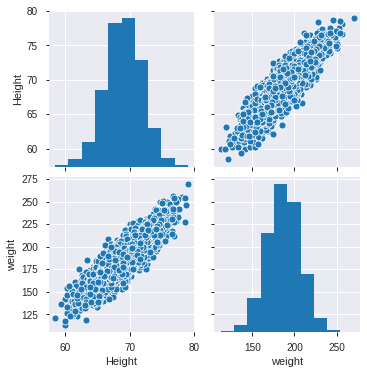

In [10]:
sns.pairplot(data)

In [11]:
pandas_profiling.ProfileReport(data)

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [13]:
# We check the size of the data
data.shape

(5000, 2)

In [14]:
# We check the first 10 rows
data[:10]

,Height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [15]:
#We separate out the independent variable height into X 
#and dependent variable weight into y
X=data.iloc[:,0].values
#y=data[:,1].values
X

array([73.84701702, 68.78190405, 74.11010539, ..., 67.01379497,
       71.55771849, 70.35187988])

In [16]:
y=data.iloc[:,1].values
y

array([241.8935632, 162.3104725, 212.7408556, ..., 199.1954001,
       185.9059095, 198.9030119])

In [17]:
# Split the data into training/testing sets
X_train1=X[:2500]
X_train2=X[2500:4500]
X_test=X[4500:]


In [18]:
X_train1

array([73.84701702, 68.78190405, 74.11010539, ..., 68.90949129,
       68.72052925, 68.31234188])

In [19]:
X_train2

array([61.0744871 , 69.57359157, 71.16501786, ..., 64.45121158,
       67.38177284, 71.36636548])

In [20]:
# Split the targets into training/testing sets
y_train1=y[:2500]
y_train2=y[2500:4500]
y_test=y[4500:]

In [21]:
y_train1

array([241.8935632, 162.3104725, 212.7408556, ..., 184.6155357,
       195.6701715, 169.7808397])

In [22]:
y_train2

array([122.6801118, 165.7847424, 198.7115194, ..., 147.0446574,
       179.319259 , 199.8815852])

In [23]:
# Modeify the data to input into sklearn
X_train1=X_train1.reshape(-1, 1)
X_train2=X_train2.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)

In [24]:
# A simple average ensemble model
model1 = linear_model.LinearRegression()
model2 = linear_model.ElasticNet()

model1.fit(X_train1,y_train1)
model2.fit(X_train2,y_train2)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)

In [25]:
print("Train Score of First Model is",model1.score(X_train1,y_train1))
print("Train Score of Second Model is",model2.score(X_train2,y_train2))
print('*'*30)
print("Test Score of First Model is",model1.score(X_test,pred1))
print("Test Score of Second Model is",model2.score(X_test,pred2))

Train Score of First Model is 0.7411557654737606
Train Score of Second Model is 0.7467592049681588
******************************
Test Score of First Model is 1.0
Test Score of Second Model is 1.0


In [26]:
finalpred=(pred1+pred2)/2
finalpred


array([188.52475223, 193.71879503, 173.63978372, 206.52109295,
       192.17775377, 183.93788511, 156.06104939, 205.53898854,
       169.0085415 , 216.0556318 , 190.57049635, 203.2426613 ,
       186.8667941 , 184.27696454, 193.86857446, 168.38944951,
       171.26079832, 179.89337136, 182.26723298, 208.59647852,
       185.19556965, 175.55065815, 196.97152678, 178.30772035,
       209.56772686, 172.74096041, 160.33849536, 192.5298769 ,
       188.04836274, 200.89876456, 203.68456671, 186.77271956,
       164.00651611, 192.71966411, 182.80365934, 210.43520221,
       196.70680089, 185.93266142, 169.19483168, 201.32175104,
       207.7914973 , 178.32675484, 193.81821058, 211.06674   ,
       190.73109835, 191.07853492, 189.73697046, 191.46822098,
       149.6570127 , 201.5698212 , 195.1876563 , 182.12069111,
       193.44102257, 190.66306253, 183.26023186, 146.43621077,
       175.91938666, 164.40208274, 184.45271759, 171.71017138,
       181.66067219, 176.39050986, 162.13796065, 185.26

In [27]:
y_test.shape

(500,)

In [28]:
finalpred.shape

(500,)

In [29]:
print(mean_squared_error(y_test, finalpred, sample_weight=None, multioutput='uniform_average'))

97.9455165191426


In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
mean_squared_error(y_test,finalpred)

97.9455165191426

In [32]:
r2_score(y_test,finalpred)

0.7399019592791114

In [33]:
model1.score(X_train1,y_train1)

0.7411557654737606

In [34]:
model1.score(X_test,y_test)

0.7427604970186248

In [35]:
model2.score(X_train2,y_train2)



0.7467592049681588

In [36]:
model2.score(X_test,y_test)

0.7348671281326109